# Wczytanie pakietów i danych
## Pakiety

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Dane

In [2]:
diabetic_data = pd.read_csv('dataset_diabetes/diabetic_data.csv')
diabetic_data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


## Wyjaśnienie wartości id

In [3]:
pd.read_csv('dataset_diabetes/IDs_mapping.csv', skipfooter=59, engine='python')

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped


Jak widzimy $5, 6, 8$ w kolumnie admission_type_id oznacza de facto nieznany typ przyjęcia, ponieważ nie był on dostępny/znany/zmapowany. Ja osobiście trochę nie widzę różnicy pomiędzy emergency i urgent, ponieważ oba oznaczają pilne przypadki (pewnie emergency oznacza krytyczny przypadek przez co bardziej istotny).

In [4]:
from IPython.display import display
with pd.option_context('max_colwidth', 800):
    display(pd.read_csv('dataset_diabetes/IDs_mapping.csv', skiprows=10, skipfooter=27, engine='python'))

,discharge_disposition_id,description
0,1,Discharged to home
1,2,Discharged/transferred to another short term hospital
2,3,Discharged/transferred to SNF
3,4,Discharged/transferred to ICF
4,5,Discharged/transferred to another type of inpatient care institution
5,6,Discharged/transferred to home with home health service
6,7,Left AMA
7,8,Discharged/transferred to home under care of Home IV provider
8,9,Admitted as an inpatient to this hospital
9,10,Neonate discharged to another hospital for neonatal aftercare


Znowu widzimy, że id o numerach $18, 25, 26$ oznaczają to samo, czyli nieznany wypis szpitalny.

In [5]:
pd.read_csv('dataset_diabetes/IDs_mapping.csv', skiprows=42, engine='python')

,admission_source_id,description
0,1,Physician Referral
1,2,Clinic Referral
2,3,HMO Referral
3,4,Transfer from a hospital
4,5,Transfer from a Skilled Nursing Facility (SNF)
5,6,Transfer from another health care facility
6,7,Emergency Room
7,8,Court/Law Enforcement
8,9,Not Available
9,10,Transfer from critial access hospital


Znowu widzimy to samo, to znaczy, że id numer $9, 15, 17, 20, 21$ oznacza to samo, czyli brak danych.

In [6]:
diabetic_data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

# Próba ustalenia zmiennej objaśnianej
Wydaje mi się, że możemy wyrzucić z jakiekolwiek próby predykcji kolumny:
* ``encounter_id``, ponieważ jest ona tylko identyfikatorem przyjęcia pacjenta, 
* ``patient_nbr`` , ponieważ zawierają one dane, które indentyfikują konkretnego pacjenta (wydaje mi się, że pacjenci raczej nie powtarzają się w predykcjach, więc ciężko będzie predykować na nowych danych, ponieważ co chwilę będziemy dostawać nowe numery).

W przypadku ``patient_nbr`` może dochodzić często do przeuczenia związanym z konkretną osobą. Poza tym jest to rzecz unikalna, która sprawiłaby, że nie bylibyśmy w stanie predykować na nowych osobach.

Ciekawymi problemami do predykcji mogą być
* próba predykcji zmiennej ``time_in_hospital``, na podstawie ogólnych danych, takich jak ``race``, ``gender``, ``age``, ``weight``, ``admission_type_id``, ``payer_code``, ``number_outpatient``, ``number_inpatient``, ``number_emergency``. Reszta danych wydaję się pobierana w trakcie pobytu w szpitalu, więc próba predykcji na jej podstawie jest raczej nie wskazana (przynajmniej mi się tak wydaje). Interesuje nas ile dana osoba spędzi czasu w szpitalu, co może być przydatne w próbie określenia procentu zapełnienia szpitalu w danym momencie. (Problem regresji)
* próba predykcji jednej z zmiennych ``num_lab_procedures``, ``num_procedures``, ``num_medications``, na podstawie ogólnych danych, takich jak ``race``, ``gender``, ``age``, ``weight``, ``admission_type_id``, ``payer_code``, ``number_outpatient``, ``number_inpatient``, ``number_emergency``. Mogą wydać się istotne z punktu widzenia, ile personelu potrzeba do danych procedur. (Problem regresji)
* próba predykcji zmiennej ``readmitted`` na podstawie wszystkich innych zmiennych oprócz tych wskazanych na początku. Istotne może się okazać, czy dany pacjent ponownie trafi do szpitalu. Ewentualnie, który czynnik ma największy wpływ na to. (Problem klasyfikacji)

Najbardziej istotnym problemem wydaje mi się **ostatni**, dlatego nim się zajmę.

In [7]:
diabetic_data.encounter_id.value_counts() # potwierdzenie unikalności

77856768     1
279188820    1
96928116     1
117757260    1
166782282    1
            ..
390757988    1
109989474    1
241154934    1
51363420     1
96210942     1
Name: encounter_id, Length: 101766, dtype: int64

In [8]:
counted_patient = diabetic_data.patient_nbr.value_counts()
sum(counted_patient <= 2)/len(counted_patient)

0.9113649710562376

Jak widzimy $91\%$ pacjentów miało mniej bądź 2 wizyty. 

In [9]:
diabetic_data.drop(columns=['encounter_id', 'patient_nbr'], inplace=True)

Sprawdźmy, czy występują jakieś duplikaty w danych

In [10]:
sum(diabetic_data.duplicated())

0

# Ustalenie typów kolumn

In [11]:
diabetic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      101766 non-null  object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   weight                    101766 non-null  object
 4   admission_type_id         101766 non-null  int64 
 5   discharge_disposition_id  101766 non-null  int64 
 6   admission_source_id       101766 non-null  int64 
 7   time_in_hospital          101766 non-null  int64 
 8   payer_code                101766 non-null  object
 9   medical_specialty         101766 non-null  object
 10  num_lab_procedures        101766 non-null  int64 
 11  num_procedures            101766 non-null  int64 
 12  num_medications           101766 non-null  int64 
 13  number_outpatient         101766 non-null  int64 
 14  numb

Mamy $37$ kolumn typu object oraz $11$ typu int64.

# Identyfikacja brakujących danych

In [12]:
for column in diabetic_data.columns:
    print(f'{column}: {sum(diabetic_data[column] == "?")/diabetic_data.shape[0]*100:.2f}%')

race: 2.23%
gender: 0.00%
age: 0.00%
weight: 96.86%
admission_type_id: 0.00%
discharge_disposition_id: 0.00%
admission_source_id: 0.00%
time_in_hospital: 0.00%
payer_code: 39.56%
medical_specialty: 49.08%
num_lab_procedures: 0.00%
num_procedures: 0.00%
num_medications: 0.00%
number_outpatient: 0.00%
number_emergency: 0.00%
number_inpatient: 0.00%
diag_1: 0.02%
diag_2: 0.35%
diag_3: 1.40%
number_diagnoses: 0.00%
max_glu_serum: 0.00%
A1Cresult: 0.00%
metformin: 0.00%
repaglinide: 0.00%
nateglinide: 0.00%
chlorpropamide: 0.00%
glimepiride: 0.00%
acetohexamide: 0.00%
glipizide: 0.00%
glyburide: 0.00%
tolbutamide: 0.00%
pioglitazone: 0.00%
rosiglitazone: 0.00%
acarbose: 0.00%
miglitol: 0.00%
troglitazone: 0.00%
tolazamide: 0.00%
examide: 0.00%
citoglipton: 0.00%
insulin: 0.00%
glyburide-metformin: 0.00%
glipizide-metformin: 0.00%
glimepiride-pioglitazone: 0.00%
metformin-rosiglitazone: 0.00%
metformin-pioglitazone: 0.00%
change: 0.00%
diabetesMed: 0.00%
readmitted: 0.00%


In [13]:
counted_type = diabetic_data.admission_type_id.value_counts()
print(f'{sum(counted_type[[5, 6, 8]])/sum(counted_type)*100:.2f}%')

10.22%


``Admission_type_id`` ma także $10.22\%$ braku danych wg mojej interpretacji.

In [14]:
counted_type = diabetic_data.discharge_disposition_id.value_counts() # brak obserwacji dla id = 26
print(f'{sum(counted_type[[18,25]])/sum(counted_type)*100:.2f}%')

4.60%


``discharge_disposition_id`` ma $4.6\%$ braku danych wg mojej interpretacji.

In [15]:
counted_type = diabetic_data.admission_source_id.value_counts()
print(f'{sum(counted_type[[9, 17, 20]])/sum(counted_type)*100:.2f}%') # brak obserwacji dla id 15 i 21

6.94%


``admission_source_id`` ma $6.94\%$ braku danych wg mojej interpretacji.

Jak widzimy, znaczące braki mamy w kolumnie:
* ``weight`` - prawie w ogóle nie mamy w niej danych, więc imputacja za bardzo nie ma sensu dla tej kolumny.
* ``medical_speciality`` - kolumna, która wydaje się istotna z punktu widzenia predykcji wartości, bo mówi nam o odziale, z którego przychodzi dany pacjent.
* ``payer_code`` - kolumna, która mówi o kodzie ubezpieczyciela naszego pacjenta, więc raczej nie powinna mieć wpływu na predykcję, czy dana osoba będzie ponownie w szpitalu. Dlatego pozbędziemy się tej kolumny.

Reszta kolumn nie ma braków, albo ma je na poziomie poniżej $10 \%$, czyli dotyczy dosyć małej grupy obserwacji.

In [16]:
diabetic_data.drop(columns=['weight', 'payer_code'], inplace=True)

# Ekspolracja danych
## Analiza jednowymiarowa
### Dane liczbowe

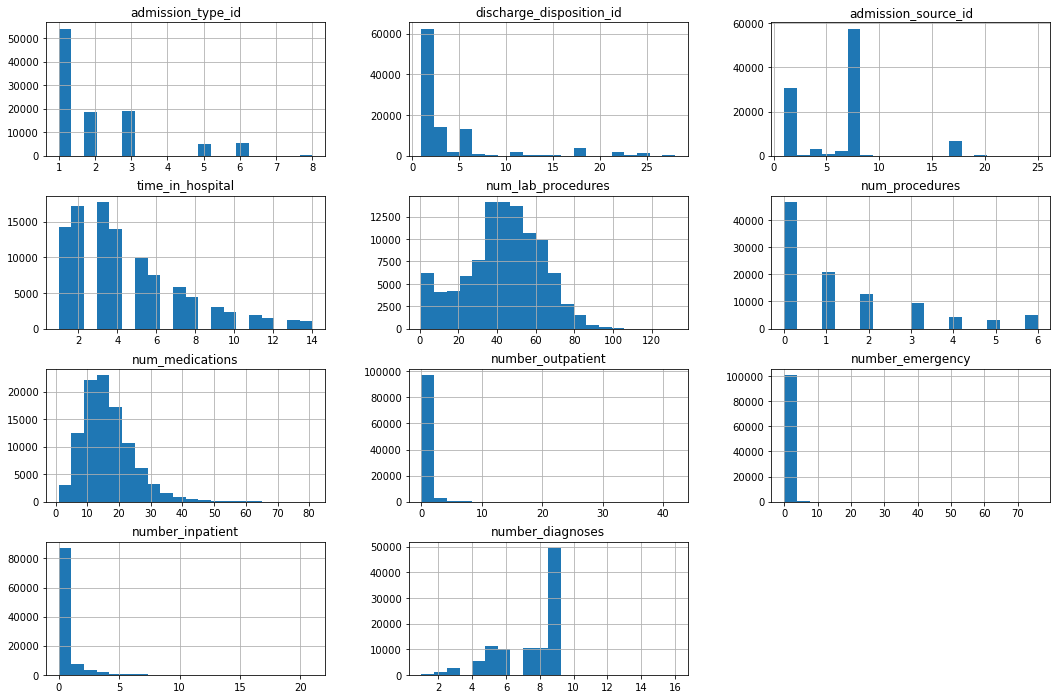

In [17]:
diabetic_data.hist(bins = 20, figsize=(18,12))
plt.show()

Zmienne ``num_medications``, ``number_outpatient``, ``number_emergency``, ``number_inpatient``, ``num_procedures`` mają głównie rozkłady prawoskośny. Natomiast zmienne ``number_diagnoses``, ``num_lab_procedures`` mają rozkłady lewoskośne. 

### Dane kategoryczne

Poniższy wypisanie służy do zauważenia pewnych faktów, które są opisane poniżej wydruku.

In [18]:
for column in diabetic_data:
    if pd.api.types.is_object_dtype(diabetic_data[column]):
        print(column)
        print(diabetic_data[column].value_counts()/diabetic_data.shape[0]*100)
        print('----------------------------------')

race
Caucasian          74.778413
AfricanAmerican    18.876639
?                   2.233555
Hispanic            2.001651
Other               1.479866
Asian               0.629876
Name: race, dtype: float64
----------------------------------
gender
Female             53.758623
Male               46.238429
Unknown/Invalid     0.002948
Name: gender, dtype: float64
----------------------------------
age
[70-80)     25.615628
[60-70)     22.092840
[50-60)     16.956547
[80-90)     16.898571
[40-50)      9.516931
[30-40)      3.709490
[90-100)     2.744532
[20-30)      1.628245
[10-20)      0.679009
[0-10)       0.158206
Name: age, dtype: float64
----------------------------------
medical_specialty
?                         49.082208
InternalMedicine          14.381031
Emergency/Trauma           7.433720
Family/GeneralPractice     7.310890
Cardiology                 5.259124
                            ...    
SportsMedicine             0.000983
Proctology                 0.000983
Speech    

Jak widzimy kolumny ``nateglinide``, ``chlorpropamide``, ``acetohexamide``, ``tolbutamide``, ``acarbose``, ``miglitol``, ``troglitazone``, ``tolazamide``, ``examide``, ``citoglipton``, ``glyburide-metformin``, ``glimepiride-pioglitazone``, ``metformin-rosiglitazone``, ``metformin-pioglitazone`` mają powyżej $99 \%$ obserwacji No\None, zatem kolumny te nie wnoszą za dużo nowych informacji.

In [19]:
columns = ['nateglinide', 'chlorpropamide', 'acetohexamide', 'tolbutamide', 'tolbutamide', 
           'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 
           'glyburide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone',
          'metformin-pioglitazone']
diabetic_data.drop(columns=columns, inplace=True)

#### Race

In [20]:
diabetic_data['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

Jak widzimy, obserwacje, których ``race`` jest nieznane, asian, hispanic, other jest relatywnie mało. Dlatego potraktujemy te wszystkie obserwacje jak other.

In [21]:
diabetic_data.loc[diabetic_data.race.isin(['?', 'Asian', 'Hispanic']), 'race'] = 'Other'
diabetic_data.race.value_counts()

Caucasian          76099
AfricanAmerican    19210
Other               6457
Name: race, dtype: int64

#### Gender

In [22]:
diabetic_data['gender'].value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

Obserwacji o nieznanej płci jest dosyć mało, więc możemy się ich pozbyć, aby zmniejszyć granulację danych.

In [23]:
diabetic_data = diabetic_data[diabetic_data.gender != 'Unknown/Invalid']

#### Age

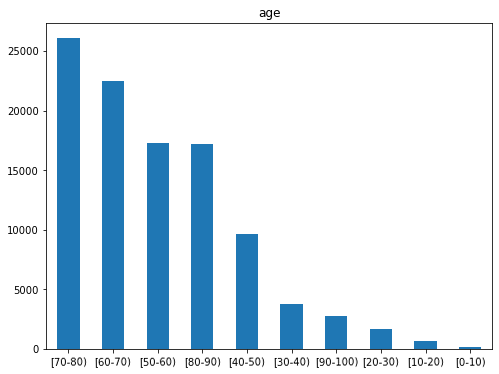

In [24]:
plt.figure(figsize=(8,6))
plt.title('age')
diabetic_data.age.value_counts().plot(kind = 'bar', rot = 1)
plt.show()

Widzimy, że większość obserwacji tyczy się osób w wieku 50+. Może dobrym pomysłem było by zebranie tych grup w jeszcze większe przedziały.
#### Medical speciality

In [25]:
sum(diabetic_data.medical_specialty.value_counts() <= 0.1*diabetic_data.shape[0]/len(diabetic_data.medical_specialty.unique()))

49

Jak widzimy powyżej, aż 49 specjalności ma mniej niż $10\%$ tego, gdyby wartości były równiernie rozłożone.

In [26]:
filtr = diabetic_data.medical_specialty.value_counts() <= 0.1*diabetic_data.shape[0]/len(diabetic_data.medical_specialty.unique())
diabetic_data['medical_specialty'] = diabetic_data.medical_specialty.apply(lambda x: "Other" if filtr[x] else x)
diabetic_data.medical_specialty

0         Pediatrics-Endocrinology
1                                ?
2                                ?
3                                ?
4                                ?
                    ...           
101761                           ?
101762                           ?
101763                           ?
101764             Surgery-General
101765                           ?
Name: medical_specialty, Length: 101763, dtype: object

#### Diag1, Diag2, Diag3
Zastosujemy to samo przekształcenie co powyżej.

In [27]:
filtr = diabetic_data.diag_1.value_counts() <= 0.1*diabetic_data.shape[0]/len(diabetic_data.diag_1.unique())
diabetic_data['diag_1'] = diabetic_data.diag_1.apply(lambda x: "Other" if filtr[x] else x)
diabetic_data.diag_1.unique().shape[0]

342

In [28]:
filtr = diabetic_data.diag_2.value_counts() <= 0.1*diabetic_data.shape[0]/len(diabetic_data.diag_2.unique())
diabetic_data['diag_2'] = diabetic_data.diag_2.apply(lambda x: "Other" if filtr[x] else x)
diabetic_data.diag_2.unique().shape[0]

330

In [29]:
filtr = diabetic_data.diag_3.value_counts() <= 0.1*diabetic_data.shape[0]/len(diabetic_data.diag_3.unique())
diabetic_data['diag_3'] = diabetic_data.diag_3.apply(lambda x: "Other" if filtr[x] else x)
diabetic_data.diag_3.unique().shape[0]

364

#### max_glu_serum, A1Cresult, metformin, glimepiride, glyburide, pioglitazone, rosiglitazone

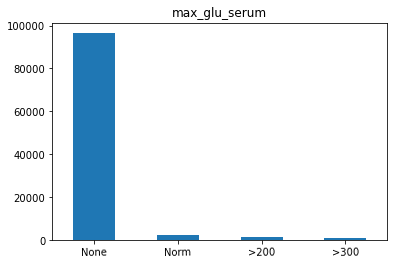

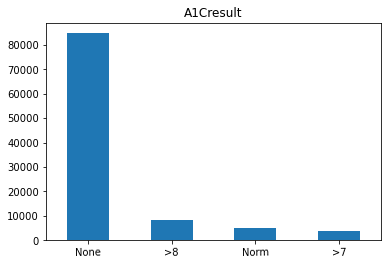

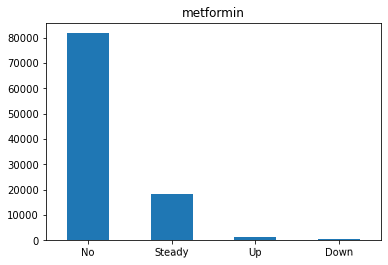

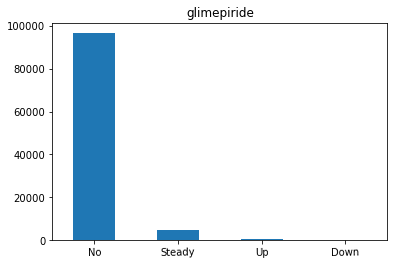

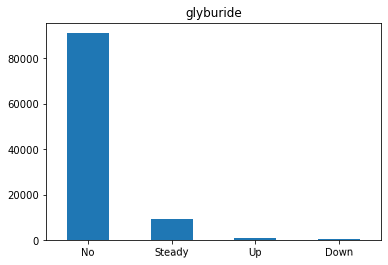

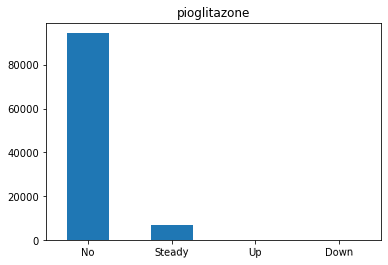

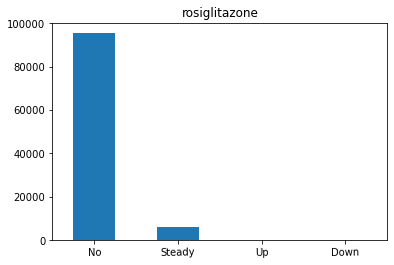

In [30]:
columns = ['max_glu_serum', 'A1Cresult', 'metformin', 'glimepiride', 'glyburide', 'pioglitazone', 'rosiglitazone']
for column in columns:
    plt.title(column)
    diabetic_data[column].value_counts().plot(kind = 'bar', rot = 1)
    plt.show()
    

Widzimy znaczną przewagę w tych zmiennych obserwacji ``None`` i ``No``.
#### insulin, change, diabetesMed, readmitted

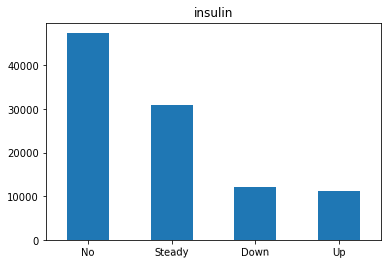

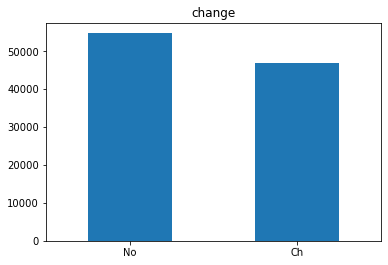

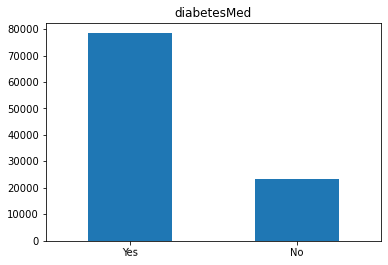

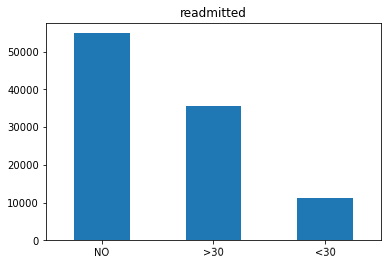

In [31]:
columns = ['insulin', 'change', 'diabetesMed', 'readmitted']
for column in columns:
    plt.title(column)
    diabetic_data[column].value_counts().plot(kind = 'bar', rot = 1)
    plt.show()
    

Zmienna predykowana **readmitted** jest niezbalansowana, widzimy przewagę obserwacji **NO**. Tak samo nie zbilansowanymi zmiennymi są **insulin**, **diabetesMed**. Jedyna zmienna zbilansową jest **change**

## Analiza wielowymiarowa

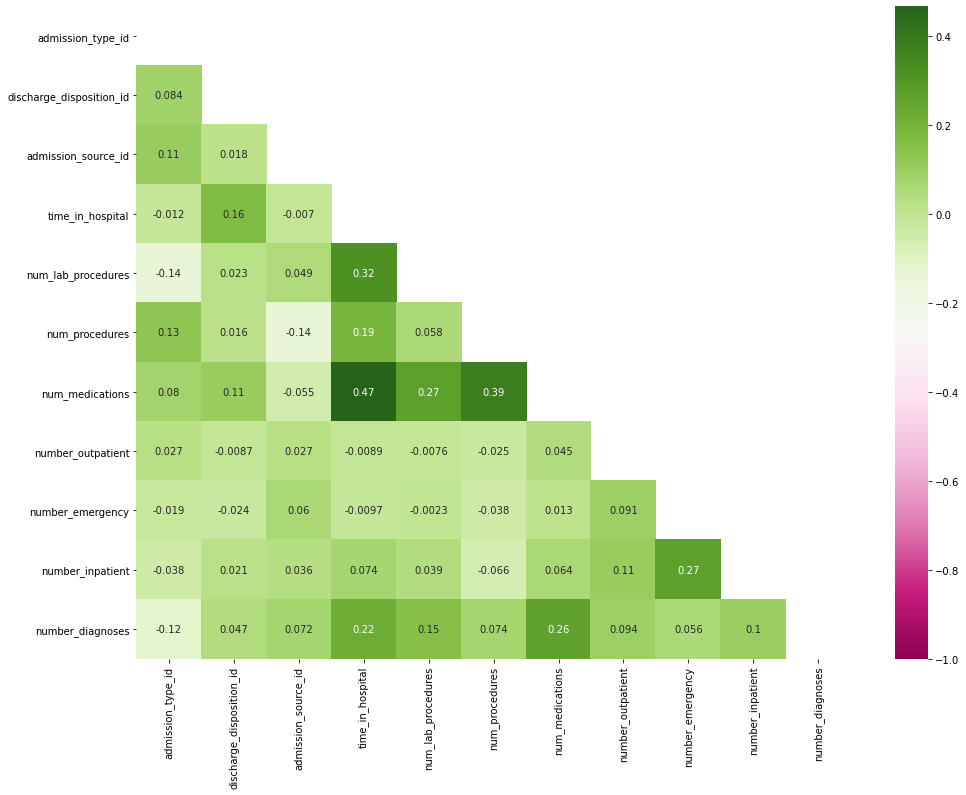

In [32]:
corMatrix = diabetic_data.corr()
mask = np.triu(np.ones_like(corMatrix, dtype=bool))
plt.figure(figsize=(16, 12))
sns.heatmap(corMatrix, mask=mask, annot=True, vmin=-1, cmap="PiYG")
plt.show()

Jedynymi zmiennymi, które moglibyśmy uznać za skorelowane **time_in_hospital** i **num_medications**. Reszta zmiennych jest raczej słabo skorelowana.
Spójrzmy teraz, czy występują jakieś zależności między naszą zmienną celu **readmitted**, a innymi zmiennymi.

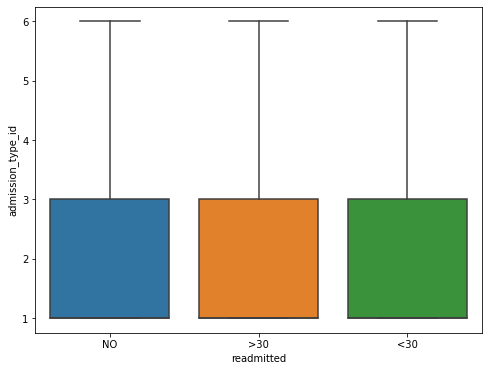

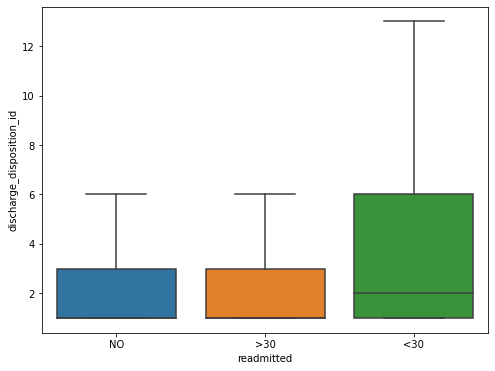

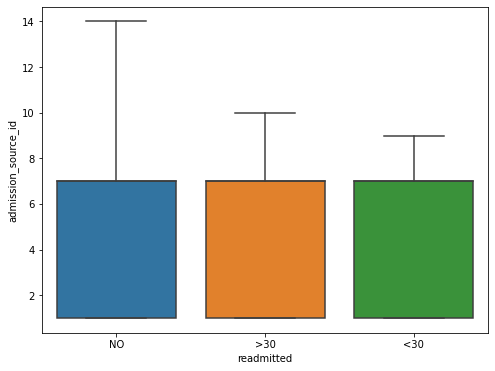

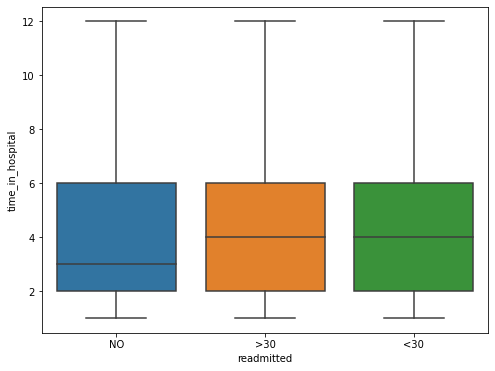

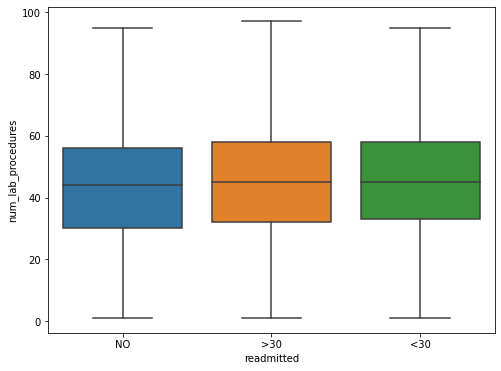

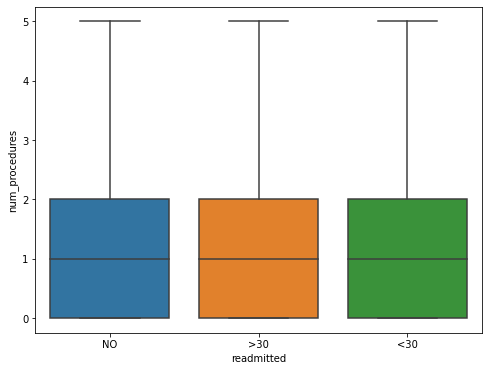

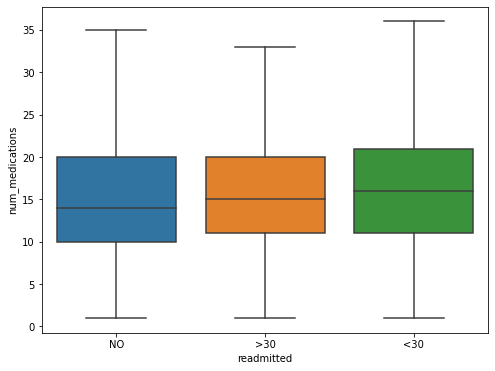

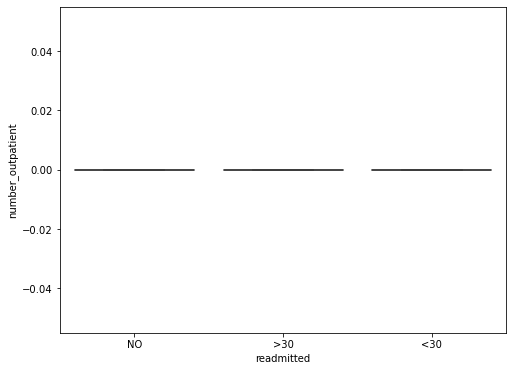

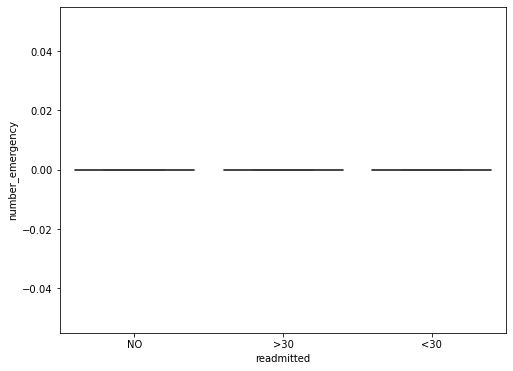

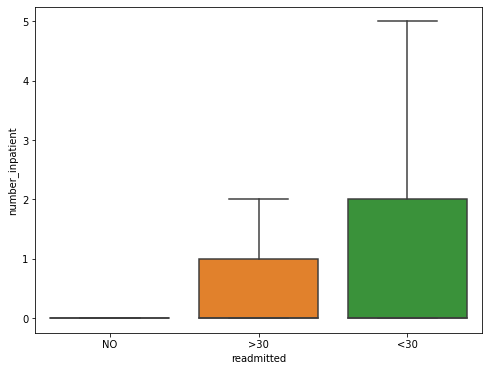

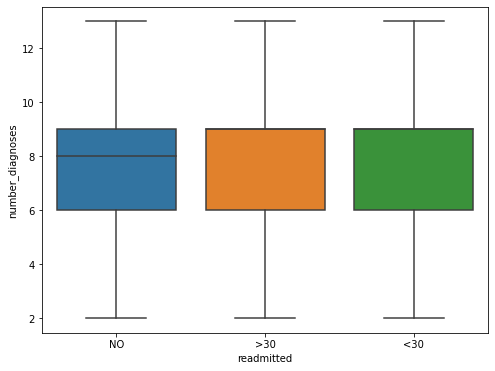

In [33]:
num_columns = diabetic_data.select_dtypes('number').columns.tolist()

for column in num_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='readmitted',y=column, data=diabetic_data, showfliers = False)
    plt.show()

Nie widać, za bardzo jakiś zależności z boxplotów między zmienną celu, a zmiennymi numerycznymi. Dosyć ciekawe wydaje się to, że zwiększona liczba hospitalizacji oznacza mniej niż 30 dniowy pobyt, natomiast dłuższe pobyty oznaczają mniej niż 2 hospitalizacje.

# Imputacja brakujących danych i enkoding zmiennych

In [34]:
diabetic_data = diabetic_data.replace(to_replace='?', value=np.nan)
diabetic_data

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,glipizide-metformin,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,Pediatrics-Endocrinology,41,0,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,NaN,59,0,...,No,No,No,No,No,Up,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,NaN,11,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,NaN,44,1,...,No,No,No,No,No,Up,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,NaN,51,0,...,No,Steady,No,No,No,Steady,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),1,3,7,3,NaN,51,0,...,No,No,No,No,No,Down,No,Ch,Yes,>30
101762,AfricanAmerican,Female,[80-90),1,4,5,5,NaN,33,3,...,No,No,No,No,No,Steady,No,No,Yes,NO
101763,Caucasian,Male,[70-80),1,1,7,1,NaN,53,0,...,No,No,No,No,No,Down,No,Ch,Yes,NO
101764,Caucasian,Female,[80-90),2,3,7,10,Surgery-General,45,2,...,No,Steady,No,Steady,No,Up,No,Ch,Yes,NO


Zamieniamy znaki zapytania na *np.NaN*, aby wygodniej było nam imputować zmienne. Poza tym wszytkie typy id, które wcześniej uznałem za tożsame z brakiem danych zamieniamy na brak danych.

In [35]:
diabetic_data['admission_type_id'] = diabetic_data.admission_type_id.replace(to_replace=[5, 8], value=6)
diabetic_data['discharge_disposition_id'] = diabetic_data.discharge_disposition_id.replace(to_replace=[18, 25], value=18)
diabetic_data['admission_source_id'] = diabetic_data.admission_source_id.replace(to_replace=[9, 20], value=17)

In [36]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='constant', fill_value='Other')
imputed_diabetic = pd.DataFrame(imputer.fit_transform(diabetic_data), columns=diabetic_data.columns)
imputed_diabetic

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,glipizide-metformin,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,18,1,1,Pediatrics-Endocrinology,41,0,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,Other,59,0,...,No,No,No,No,No,Up,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,Other,11,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,Other,44,1,...,No,No,No,No,No,Up,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,Other,51,0,...,No,Steady,No,No,No,Steady,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101758,AfricanAmerican,Male,[70-80),1,3,7,3,Other,51,0,...,No,No,No,No,No,Down,No,Ch,Yes,>30
101759,AfricanAmerican,Female,[80-90),1,4,5,5,Other,33,3,...,No,No,No,No,No,Steady,No,No,Yes,NO
101760,Caucasian,Male,[70-80),1,1,7,1,Other,53,0,...,No,No,No,No,No,Down,No,Ch,Yes,NO
101761,Caucasian,Female,[80-90),2,3,7,10,Surgery-General,45,2,...,No,Steady,No,Steady,No,Up,No,Ch,Yes,NO


Teraz enkodujemy nasze zmienne.

In [37]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import category_encoders as ce

age_encoder = ce.ordinal.OrdinalEncoder(
    cols=['age'],
    mapping = [{'col':'age', 
               'mapping':{
                   '[0-10)': 1, '[10-20)': 2, '[20-30)': 3, '[30-40)':4,
                   '[40-50)': 5, '[50-60)': 6, '[60-70)': 7, '[70-80)':8,
                   '[80-90)': 9, '[90-100)': 10}
              }]
)

Wiek enkodujemy porządkowo natomiast resztę one hot encoderem. 

In [38]:
ohe_columns = diabetic_data.select_dtypes(exclude='number').columns.tolist()
ohe_columns.remove('readmitted')
ohe_columns.remove('age')
ohe_columns.extend(['admission_type_id', 'discharge_disposition_id', 'admission_source_id'])
ohe_columns

['race',
 'gender',
 'medical_specialty',
 'diag_1',
 'diag_2',
 'diag_3',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'glimepiride',
 'glipizide',
 'glyburide',
 'pioglitazone',
 'rosiglitazone',
 'insulin',
 'glipizide-metformin',
 'change',
 'diabetesMed',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id']

Dodałem kolumny z id, bo są one de facto zmiennymi kategorycznymi. Usunąłem naszą zmienną celu z **One Hot Encodera**, ponieważ w zależności od modelu trzeba będzie ją inaczej za enkodować. Jako, że *Scikit-learn* domyślnie przyjmuje target zaenkodowany **Label Encoderem** to jego użyjemy do encodingu zmiennej readmitted.

In [39]:
le = LabelEncoder()
imputed_diabetic_y = le.fit_transform(imputed_diabetic.readmitted)
imputed_diabetic_y.shape

(101763,)

In [40]:
imputed_diabetic_x = imputed_diabetic.drop(columns=['readmitted'])

In [41]:
encoder = ColumnTransformer([
        ('age_encoder', age_encoder, 'age'),
        ('one_hot_encoder', OneHotEncoder(drop='first'), ohe_columns),
    ],
    remainder='passthrough'
)
imputed_diabetic_x = encoder.fit_transform(imputed_diabetic_x)

In [42]:
imputed_diabetic_x

<101763x1141 sparse matrix of type '<class 'numpy.float64'>'
	with 2449804 stored elements in Compressed Sparse Row format>

Jak widzimy powyżej zmienna **imputed_diabetic_y** zawiera zaenkodowaną kolumnę *readmitted*, natomiast **imputed_diabetic_x** jest macierzą rzadką reszty naszych danych.